In [74]:
import pymysql
import pandas as pd
import sqlalchemy
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from dateutil.parser import parse 

In [75]:
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='password',db='project')
cursor=conn.cursor()

In [76]:
df=pd.read_sql_query("SELECT * FROM sales",conn)
df.head(10)

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,sale_id,cust_id,branch_id,product_id,product_price,quantity,sales_date
0,S01,1,218654,P01,100,2,2022-02-15
1,S02,2,289415,P02,250,3,2020-04-14
2,S03,3,272682,P03,200,4,2020-11-13
3,S04,4,275394,P04,180,2,2021-08-06
4,S06,6,296483,P06,280,5,2021-02-27
5,S07,7,214563,P07,300,6,2021-04-18
6,S08,8,284566,P08,250,7,2021-03-12
7,S09,9,274681,P09,200,2,2022-02-08
8,S10,10,218654,P01,100,4,2021-02-07
9,S100,100,274681,P35,260,5,2021-10-26


In [77]:
df["branch_details"]=pd.read_sql_query("select concat(b.branch_name,'-',b.city) from branch b join sales s  where b.branch_id =s.branch_id;",conn)
df["branch_details"]

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


0           Walmart Supercenter-Kansas
1           Walmart Supercenter-Kansas
2           Walmart Supercenter-Kansas
3           Walmart Supercenter-Kansas
4           Walmart Supercenter-Kansas
                    ...               
91    Crayola LLC company-Pennsylvania
92    Crayola LLC company-Pennsylvania
93    Crayola LLC company-Pennsylvania
94    Crayola LLC company-Pennsylvania
95    Crayola LLC company-Pennsylvania
Name: branch_details, Length: 96, dtype: object

In [78]:
df["product_details"]=pd.read_sql_query("select concat(p.product_name,'-',p.product_category) from product p join sales s  where p.product_id =s.product_id;",conn)
df["product_details"]

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


0     parle biscuit-snack
1     parle biscuit-snack
2     parle biscuit-snack
3     parle biscuit-snack
4     parle biscuit-snack
             ...         
91          banana-fruits
92       tangerine-fruits
93      potato-vegetables
94     brinjal-vegetables
95      chilly-vegetables
Name: product_details, Length: 96, dtype: object

In [79]:
df["sale_amount"]=pd.read_sql_query("select product_price * quantity as sale_amount from sales;",conn)
df["sale_amount"]

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


0      200
1      750
2      800
3      360
4     1400
      ... 
91     600
92    4080
93     800
94    3200
95    2250
Name: sale_amount, Length: 96, dtype: int64

In [80]:
df["year"]=pd.read_sql_query("SELECT date_format(sales_date,'%Y') AS Year FROM sales",conn)
df["year"]

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


0     2022
1     2020
2     2020
3     2021
4     2021
      ... 
91    2020
92    2021
93    2021
94    2021
95    2021
Name: year, Length: 96, dtype: object

In [81]:
df["month"]=pd.read_sql_query("SELECT date_format(sales_date,'%M') AS Month FROM sales",conn)
df["month"]

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


0     February
1        April
2     November
3       August
4     February
        ...   
91      August
92     October
93        July
94      August
95     October
Name: month, Length: 96, dtype: object

In [82]:
data = pd.DataFrame({
    'sale_id':df["sale_id"],
    'cust_id':df["cust_id"],
    'branch_id':df["branch_id"],
    'branch_details':df["branch_details"],
    'product_id':df["product_id"],
    'product_details':df["product_details"],
    'product_price':df["product_price"],
    'quantity':df["quantity"],
    'sale_amount':df["sale_amount"],
    'sales_date':df["sales_date"],
    'sales_year':df["year"],
    'sales_month':df["month"],
})
data

,sale_id,cust_id,branch_id,branch_details,product_id,product_details,product_price,quantity,sale_amount,sales_date,sales_year,sales_month
0,S01,1,218654,Walmart Supercenter-Kansas,P01,parle biscuit-snack,100,2,200,2022-02-15,2022,February
1,S02,2,289415,Walmart Supercenter-Kansas,P02,parle biscuit-snack,250,3,750,2020-04-14,2020,April
2,S03,3,272682,Walmart Supercenter-Kansas,P03,parle biscuit-snack,200,4,800,2020-11-13,2020,November
3,S04,4,275394,Walmart Supercenter-Kansas,P04,parle biscuit-snack,180,2,360,2021-08-06,2021,August
4,S06,6,296483,Walmart Supercenter-Kansas,P06,parle biscuit-snack,280,5,1400,2021-02-27,2021,February
...,...,...,...,...,...,...,...,...,...,...,...,...
91,S94,94,284566,Crayola LLC company-Pennsylvania,P17,banana-fruits,200,3,600,2020-08-30,2020,August
92,S95,95,274681,Crayola LLC company-Pennsylvania,P18,tangerine-fruits,1020,4,4080,2021-10-27,2021,October
93,S96,96,272682,Crayola LLC company-Pennsylvania,P12,potato-vegetables,200,4,800,2021-07-13,2021,July
94,S97,97,275394,Crayola LLC company-Pennsylvania,P13,brinjal-vegetables,800,4,3200,2021-08-04,2021,August


In [83]:
data.to_csv(r'\Desktop\sales_trans.csv',index=False,header=False)

In [84]:
sales_trans=pd.read_sql_query("select * from sales_transformation",conn)
sales_trans

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,sale_id,cust_id,branch_id,branch_details,product_id,product_details,product_price,quantity,sale_amount,sales_date,sales_year,sales_month
0,S01,1,218654,Walmart Supercenter-Kansas,P01,parle biscuit-snack,100,2,200,2022-02-15,2022,February
1,S02,2,289415,Walmart Supercenter-Kansas,P02,parle biscuit-snack,250,3,750,2020-04-14,2020,April
2,S03,3,272682,Walmart Supercenter-Kansas,P03,parle biscuit-snack,200,4,800,2020-11-13,2020,November
3,S04,4,275394,Walmart Supercenter-Kansas,P04,parle biscuit-snack,180,2,360,2021-08-06,2021,August
4,S06,6,296483,Walmart Supercenter-Kansas,P06,parle biscuit-snack,280,5,1400,2021-02-27,2021,February
...,...,...,...,...,...,...,...,...,...,...,...,...
91,S94,94,284566,Crayola LLC company-Pennsylvan,P17,banana-fruits,200,3,600,2020-08-30,2020,August
92,S95,95,274681,Crayola LLC company-Pennsylvan,P18,tangerine-fruits,1020,4,4080,2021-10-27,2021,October
93,S96,96,272682,Crayola LLC company-Pennsylvan,P12,potato-vegetables,200,4,800,2021-07-13,2021,July
94,S97,97,275394,Crayola LLC company-Pennsylvan,P13,brinjal-vegetables,800,4,3200,2021-08-04,2021,August


In [85]:
sale=pd.read_sql_query("select branch_details, count(branch_details) from sales_transformation group by branch_details;",conn)

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [86]:
sale

,branch_details,count(branch_details)
0,Bimbo bakeries-Commerce city,11
1,Crayola LLC company-Pennsylvan,13
2,fate's food market-Remus,12
3,Kellogs corporate-Battle creek,11
4,Office Depot-Seattle,13
5,Walmart Supercenter-Kansas,11
6,Wilson factory-Ada,13
7,Yankee candle company-south de,12


# Branch wise Sale

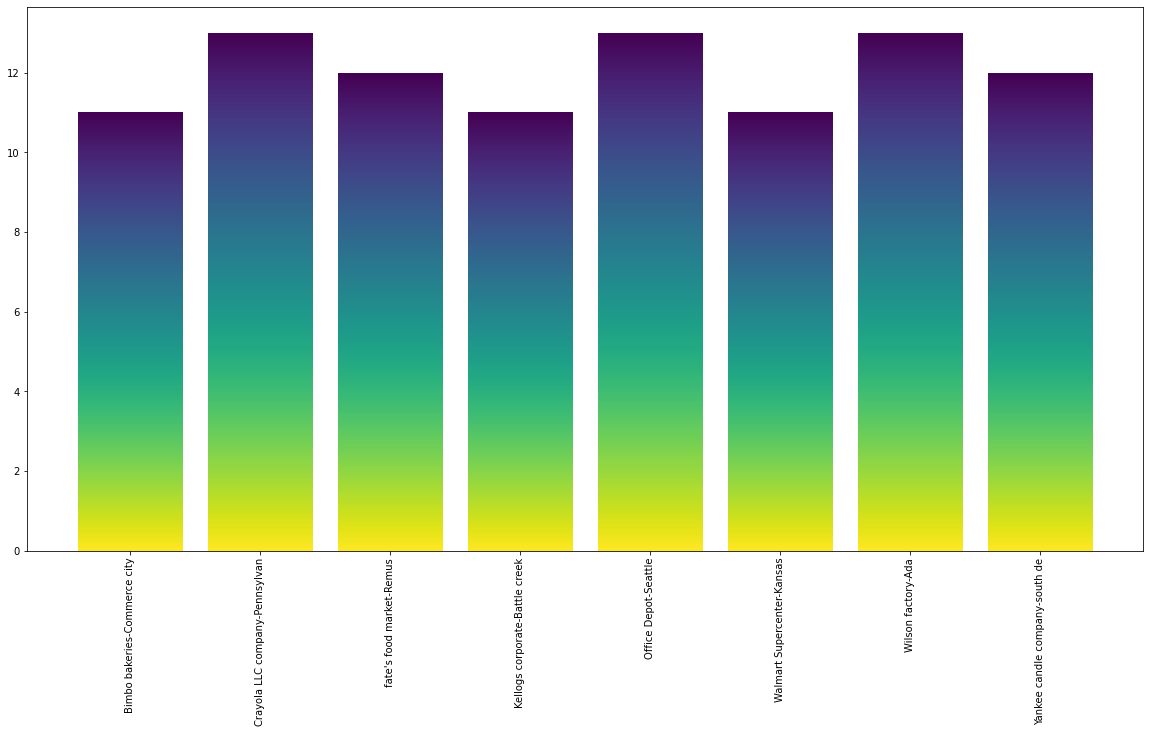

In [104]:
cursor.execute("select branch_details, count(branch_details) from sales_transformation group by branch_details;")
result = cursor.fetchall
branch= []
sale_count= []
 
for i in cursor:
    branch.append(i[0])
    sale_count.append(i[1])
     
fig, ax = plt.subplots()

bar = ax.bar(branch,sale_count)
plt.xticks(rotation=90)
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect="auto", zorder=0)
    ax.axis(lim)

gradientbars(bar)
plt.rcParams['figure.figsize'] = [20, 10]

plt.show() 

# Year wise sale -WRT- Month

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


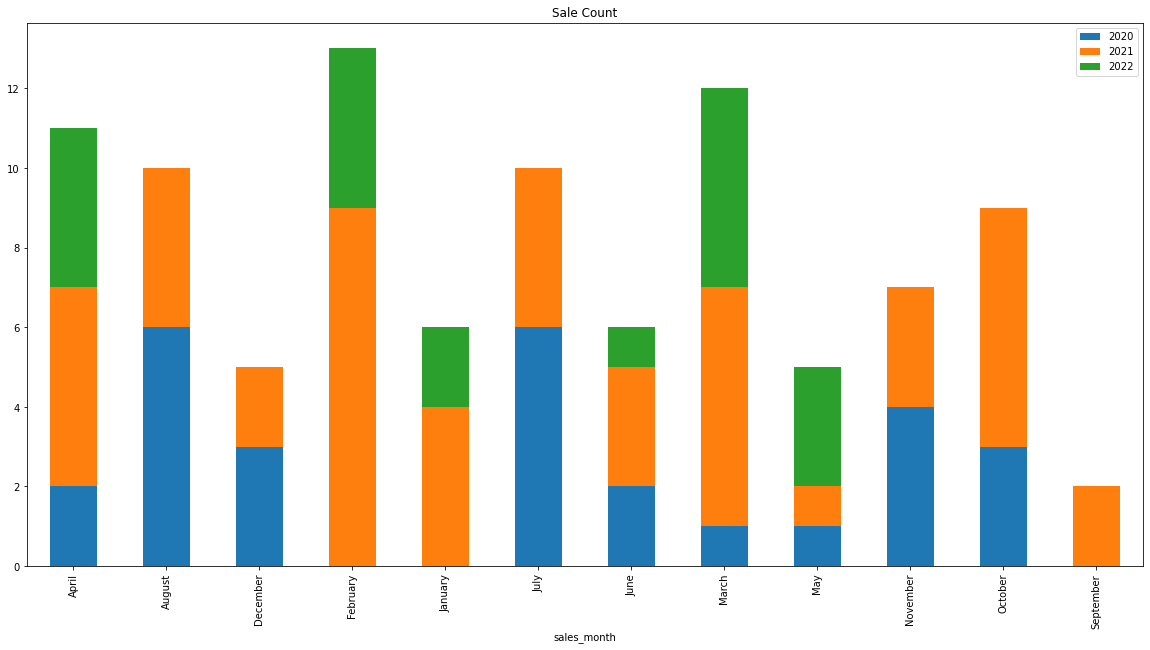

In [105]:
query="select sales_month, sum(case when sales_year='2020' then 1 else 0 end) as '2020', sum(case when sales_year='2021' then 1 else 0 end) as '2021', sum(case when sales_year='2022' then 1 else 0 end) as '2022' from sales_transformation group by sales_month;"
df = pd.read_sql(query,conn)
plot=df.plot.bar(title="Sale Count",x='sales_month',stacked=True);
plt.rcParams['figure.figsize'] = [20, 20]

In [96]:
year=pd.read_sql_query("select sales_year, count(sales_year) from sales_transformation group by sales_year;",conn)
year

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,sales_year,count(sales_year)
0,2020,28
1,2021,49
2,2022,19


# Sale trajectory - over the years

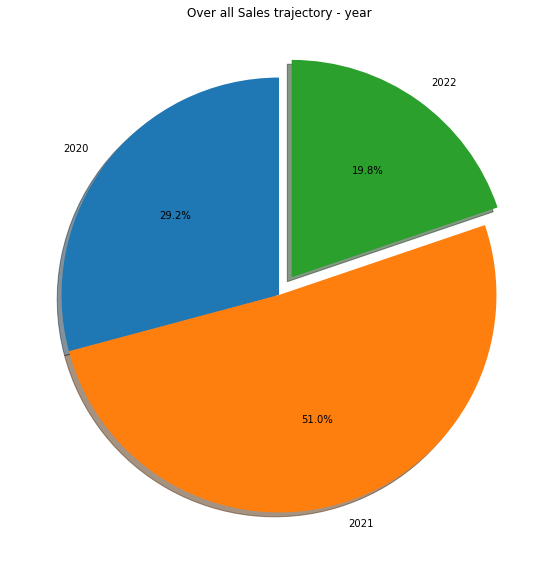

In [101]:
classes = '2020', '2021', '2022'
query="select count(sales_year) from sales_transformation group by sales_year;"
cursor.execute(query)
result = cursor.fetchall()
final_result = [i[0] for i in result]

explode = (0, 0, 0.1)  
# only "explode" the 3rd slice (i.e. '2022')

plt.pie(final_result, explode=explode, autopct='%1.1f%%',
        labels=classes,shadow=True, startangle=90)

plt.title("Over all Sales trajectory - year")
plt.rcParams['figure.figsize'] = [20,10]
plt.show()

# Most sold vs Least Sold & everything in between

/home/ubh01/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


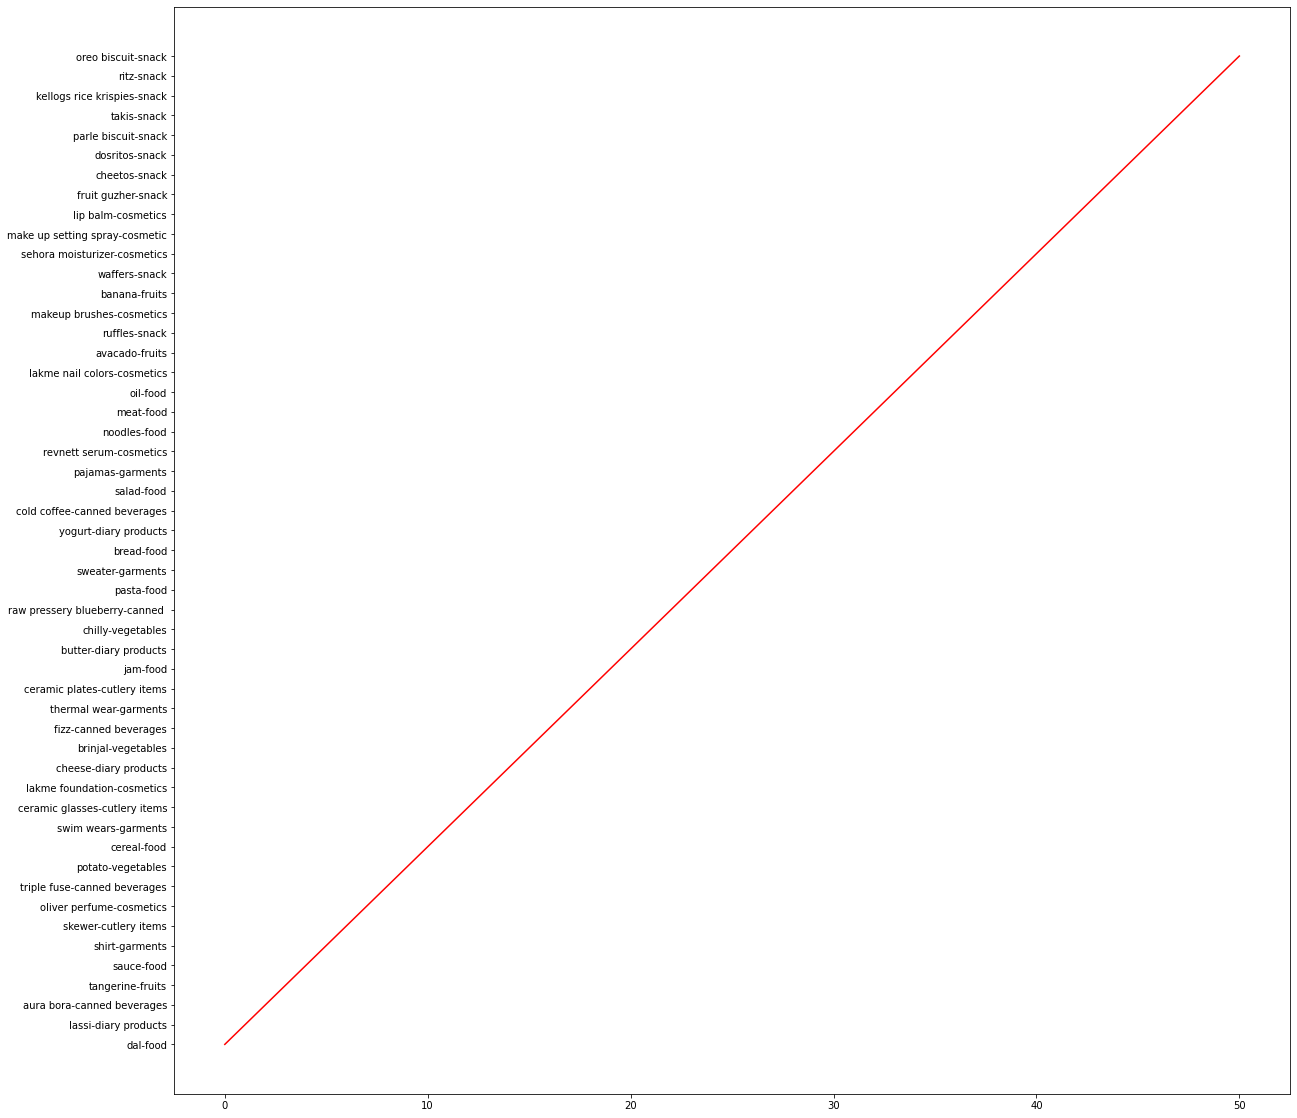

In [107]:
df=pd.read_sql_query("select product_details, count(sale_id) from sales_transformation group by product_details order by count(sale_id);;",conn)
plt.plot(df["product_details"],'r')
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()